##### DESCRIPTION - Comcast Telecom Consumer Complaints

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone

Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

Analysis Task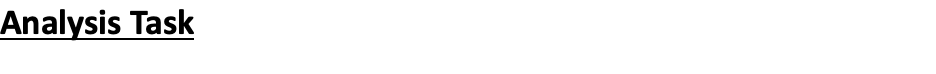

    by Mengkong Aun

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
!pip install wordcloud
import gensim
from gensim import corpora


Task 1- Import Data into Python Environment

In [2]:
df= pd.read_csv('/Users/mengkong/Desktop/STUDY/Data Science by Purdue/Coursre Structure/Python/Project/Comcast_telecom_complaints_data.csv')

In [3]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [29]:
# To view the first 5 rows of the dataset
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Created_Month,Created_Day,Created_Day of Week
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Wed
1,223441,Payment Disappear - Service Got Disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Tue
2,242732,Speed And Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Sat
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Sun
4,307175,Comcast Not Working And No Service To Boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Tue


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
df.describe(include = "all")

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,250635,Comcast,24-06-15,24-Jun-15,12:41:14 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


Task 2- Provide the trend chart for the number of complaints at monthly and daily granularity levels

In [8]:
df1 = df

In [9]:
df1['Date_month_year'] = pd.to_datetime(df1['Date_month_year'])
df1['Created_Month'] =  df1['Date_month_year'].apply(lambda x: x.month)
df1['Created_Day'] = df1['Date_month_year'].apply(lambda x: x.day)
df1['Created_Day of Week'] = df1['Date_month_year'].apply(lambda x: x.dayofweek)


In [10]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df1['Created_Day of Week']=df1['Created_Day of Week'].map(dmap)

Text(0.8, 0.85, 'Max complaints in June')

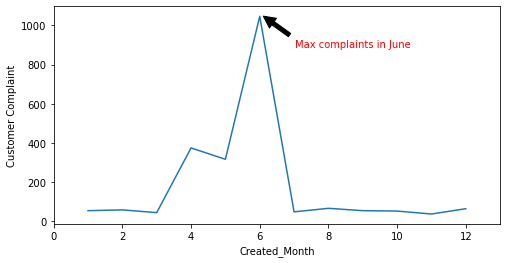

In [11]:
# number of complaint monthly
plt.figure(figsize=(8,4))
bymonth = df1.groupby('Created_Month').count().reset_index()
lp = sns.lineplot(x='Created_Month', y= 'Customer Complaint', data = bymonth, sort=False,markers = "o")
ax = lp.axes
ax.set_xlim(0,13)
ax.annotate('Max complaints in June', color='red',
            xy=(6, 1060), xycoords='data',
            xytext=(0.8, 0.85), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.1),
            horizontalalignment='right', verticalalignment='top')

(0.0, 32.0)

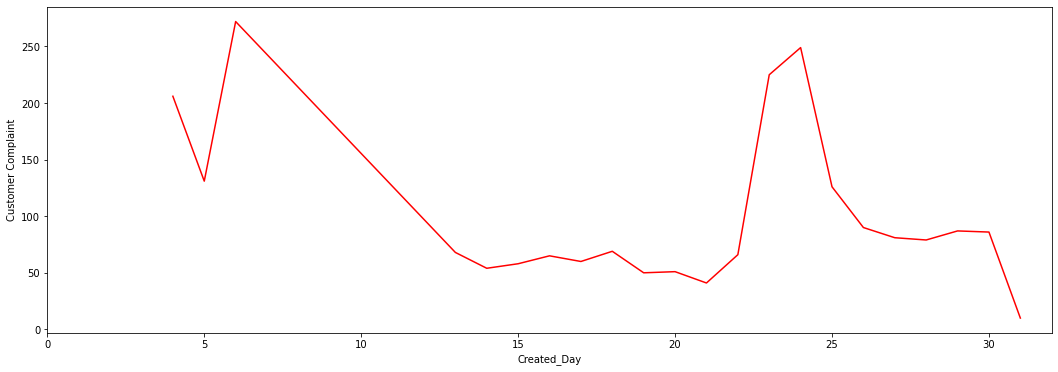

In [12]:
# number of complaint daily
plt.figure(figsize=(18,6))
byday = df1.groupby('Created_Day').count().reset_index()
lp = sns.lineplot(x='Created_Day', y= 'Customer Complaint', data = byday, sort=False, color = 'red',markers = "o", )
ax = lp.axes
ax.set_xlim(0,32)

# According to the plot, complaints occur mostly on the first and last week of each moth. 

<AxesSubplot:xlabel='Created_Day of Week', ylabel='count'>

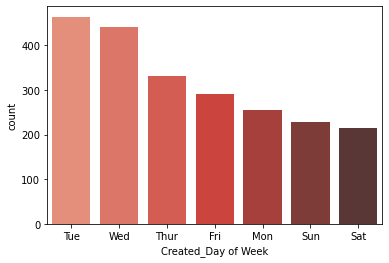

In [13]:
#number of complaints based on created day of the week

sns.countplot(x='Created_Day of Week', data = df1, order=df1['Created_Day of Week'].value_counts().index, palette ="Reds_d")


#More number of complaints happen on Tuesday and wednesday


Provide a table with the frequency of compalint types

In [14]:
df1['Customer Complaint'] = df1['Customer Complaint'].str.title() 
CT_freq = df1['Customer Complaint'].value_counts()
CT_freq

Comcast                                                            102
Comcast Data Cap                                                    30
Comcast Internet                                                    29
Comcast Data Caps                                                   21
Comcast Billing                                                     18
                                                                  ... 
Monthly Data Caps                                                    1
Comcast/Xfinity Poor Service, Fraudulent Billing And Collection      1
Lost Emails/Billing                                                  1
Improper Billing And Non Resolution Of Issues                        1
Comcast, Ypsilanti Mi Internet Speed                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

In [15]:
from wordcloud import WordCloud, STOPWORDS
common_complaints = df1['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')

for word in list_stops:
    STOPWORDS.add(word)

In [16]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)

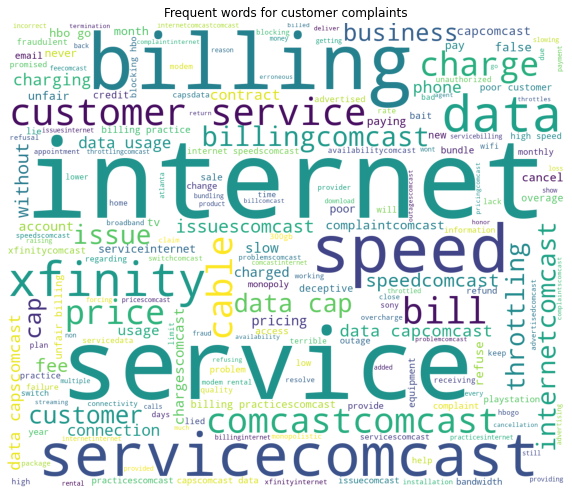

In [17]:
plt.figure( figsize=(10,12) )
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()

#Internet complaints are Maximum


In [18]:
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mengkong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mengkong/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [19]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [20]:
doc_complete = df1['Customer Complaint'].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [21]:
dictionary = corpora.Dictionary(doc_clean)
dictionary

In [22]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [23]:
from gensim.models import LdaModel

In [24]:
num_topic = 9
ldamodel = LdaModel(doc_term_matrix,num_topics=num_topic,id2word = dictionary,passes=10)

In [25]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()


(0, '0.072*"comcast" + 0.057*"bill" + 0.041*"price" + 0.025*"access" + 0.022*"contract" + 0.021*"charging" + 0.020*"without" + 0.017*"back" + 0.016*"12" + 0.015*"charged"')

(1, '0.102*"comcast" + 0.048*"internet" + 0.044*"cable" + 0.037*"xfinity" + 0.036*"service" + 0.034*"false" + 0.023*"deceptive" + 0.022*"pay" + 0.021*"monopoly" + 0.019*"high"')

(2, '0.163*"internet" + 0.145*"comcast" + 0.120*"service" + 0.086*"speed" + 0.048*"complaint" + 0.027*"slow" + 0.024*"customer" + 0.012*"terrible" + 0.011*"poor" + 0.010*"promised"')

(3, '0.048*"account" + 0.038*"2" + 0.030*"service" + 0.025*"information" + 0.024*"year" + 0.022*"xfinitycomcast" + 0.021*"misrepresentation" + 0.020*"paid" + 0.019*"day" + 0.019*"unresolved"')

(4, '0.101*"practice" + 0.073*"billing" + 0.068*"unfair" + 0.035*"comcastxfinity" + 0.033*"internet" + 0.027*"monopolistic" + 0.027*"day" + 0.026*"connection" + 0.022*"service" + 0.021*"intermittent"')

(5, '0.152*"data" + 0.133*"comcast" + 0.122*"cap" + 0.045*"service

In [26]:
word_dict = {}
for i in range(num_topic):
    words = ldamodel.show_topic(i,topn = 20)
    word_dict['Topic '+"{}".format(i)]=[i[0] for i in words]

In [27]:
pd.DataFrame(word_dict)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
0,comcast,comcast,internet,account,practice,data,comcast,comcast,service
1,bill,internet,comcast,2,billing,comcast,service,billing,comcast
2,price,cable,service,service,unfair,cap,internet,issue,charge
3,access,xfinity,speed,information,comcastxfinity,service,pricing,charge,fee
4,contract,service,complaint,year,internet,usage,throttling,service,monthly
5,charging,false,slow,xfinitycomcast,monopolistic,internet,paying,fraudulent,overage
6,without,deceptive,customer,misrepresentation,day,problem,help,business,switch
7,back,pay,terrible,paid,connection,failure,bill,incorrect,poor
8,12,monopoly,poor,day,service,show,please,equipment,3
9,charged,high,promised,unresolved,intermittent,limit,rate,several,modem


In [35]:
import pyLDAvis

In [41]:
import pyLDAvis.gensim_models

In [46]:
Lda_display = pyLDAvis.gensim_models.prepare(ldamodel,doc_term_matrix,dictionary,sort_topics=False)
pyLDAvis.display(Lda_display)

NameError: name 'ldamodel' is not defined

TASK 3 - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [44]:
df1['Highlevel_Status'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df1["Status"]]

In [45]:
df1['Highlevel_Status'].unique()

array(['Closed', 'Open'], dtype=object)

TASK 4 - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3

In [37]:
df1['State'] = df1['State'].str.title() 
st_cmp = df1.groupby(['State','Highlevel_Status']).size().unstack().fillna(0)

In [38]:
st_cmp

Highlevel_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,15.0,2.0
Florida,201.0,39.0


<AxesSubplot:ylabel='State'>

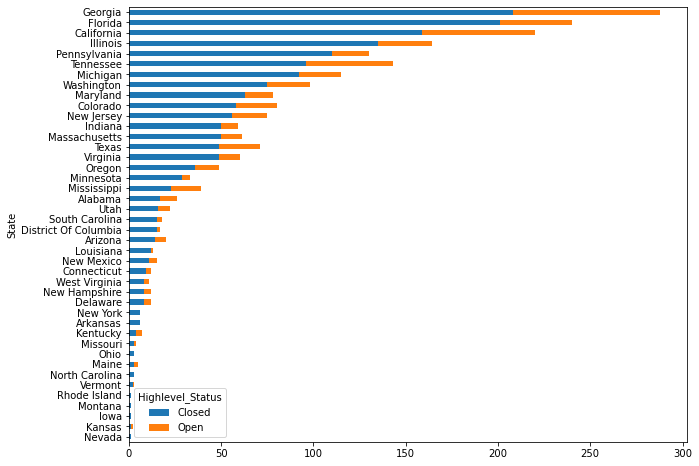

In [39]:
st_cmp.sort_values('Closed',axis = 0,ascending=True).plot(kind="barh", figsize=(10,8), stacked=True)

TASK 5 - Which state has the maximum complaints Which state has the highest percentage of unresolved com

In [31]:
df1.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0: "Complaint count"}, axis=1)[:1]

#Georgia has highest complaints

,Complaint count
State,
Georgia,288


In [40]:
CT = df1.groupby(["State","Highlevel_Status"]).size().unstack().fillna(0)
CT.sort_values('Closed',axis = 0,ascending=False)[:1]

Highlevel_Status,Closed,Open
State,,
Georgia,208.0,80.0


In [41]:
#highest percentage of unresolved complaints
CT['Resolved_cmp_prct'] = CT['Closed']/CT['Closed'].sum()*100
CT['Unresolved_cmp_prct'] = CT['Open']/CT['Open'].sum()*100

In [42]:
CT.sort_values('Unresolved_cmp_prct',axis = 0,ascending=False)[:1]

#Georgia state has highest Unresolved complaints when compared to other states 

Highlevel_Status,Closed,Open,Resolved_cmp_prct,Unresolved_cmp_prct
State,,,,
Georgia,208.0,80.0,12.18512,15.473888


TASK 6 --- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [43]:
cr = df1.groupby(['Received Via','Highlevel_Status']).size().unstack().fillna(0)
cr['resolved'] = cr['Closed']/cr['Closed'].sum()*100
cr['resolved']


Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64